# Hierarchical Clustering 

### Importing libraries


In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

### Downloading Dataset

In [54]:
!wget -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

### Reading the data with pandas


In [3]:
pdf = pd.read_csv('cars_clus.csv')
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### data_cleaning & preparing before making model

In [26]:
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')


# The dropna() function is used to remove missing values
pdf = pdf.dropna()
# If you set drop = True , the current index will be deleted entirely and the numeric index will replace it
pdf = pdf.reset_index(drop=True)

print ("Shape of dataset after cleaning: ", pdf.shape)

Shape of dataset after cleaning:  (117, 17)


In [5]:
pdf['l-per-km'] = 236.25/pdf['mpg']
pdf.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,l-per-km
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636


### Normalization

In [27]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'l-per-km']]

In [28]:
from sklearn.preprocessing import MinMaxScaler


x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333, 0.30357143],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333, 0.4       ],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333, 0.52272727],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       , 0.33333333],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333, 0.52272727]])

### clustering using scipy
- obtaining distance

In [33]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])       
D   

/tmp/ipykernel_10007/1927950562.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.585763  , 0.78573911, ..., 0.28685109, 0.25672507,
        0.19866125],
       [0.585763  , 0.        , 0.25892304, ..., 0.36698373, 0.66436916,
        0.62297526],
       [0.78573911, 0.25892304, 0.        , ..., 0.55085974, 0.83285848,
        0.79502645],
       ...,
       [0.28685109, 0.36698373, 0.55085974, ..., 0.        , 0.41920634,
        0.35863999],
       [0.25672507, 0.66436916, 0.83285848, ..., 0.41920634, 0.        ,
        0.15212198],
       [0.19866125, 0.62297526, 0.79502645, ..., 0.35863999, 0.15212198,
        0.        ]])

In [34]:
import pylab
import scipy.cluster.hierarchy

# linkage methods are used to compute the distance d(s,t) between two clusters
Z = hierarchy.linkage(D, 'complete')

/tmp/ipykernel_10007/1846544822.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [35]:
from scipy.cluster.hierarchy import fcluster
max_d= 3 # n is the number of similar values
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  8,  5,  4,  7,  5,  5,  5,  5,  5,  4,  4,  5,  8,  7,
        5,  5,  5,  4,  1, 11,  7,  7,  5,  7,  5,  8,  7,  7, 10,  9,  9,
        9,  3,  5,  1,  5,  7,  5,  3,  4,  3,  9,  5,  9,  1,  7,  7,  4,
        4,  1,  1,  7,  5,  2,  6,  4,  5,  5,  4,  4,  3,  1,  7,  7,  5,
        6,  4,  6,  8,  8,  5,  3,  4,  5,  7,  5,  4,  4,  1,  7,  5,  5,
        4,  7,  4,  4,  4,  8,  7,  5,  8,  7,  5,  5,  5,  6,  6,  6,  1,
        1,  1,  1,  7,  5,  1,  8,  1,  7,  9,  1,  8,  8,  1,  1],
      dtype=int32)

In [20]:
from scipy.cluster.hierarchy import fcluster
k = 5 # n cluster
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 2, 2,
       4, 3, 4, 1, 3, 3, 2, 2, 1, 1, 3, 3, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       3, 4, 1, 3, 3, 1, 1], dtype=int32)

### dendrogram

In [52]:
# x1 = 10
# x2 = 20
# x3 = 30
# print("%s %s %s" % (x1,x2,x3))

10 20 30


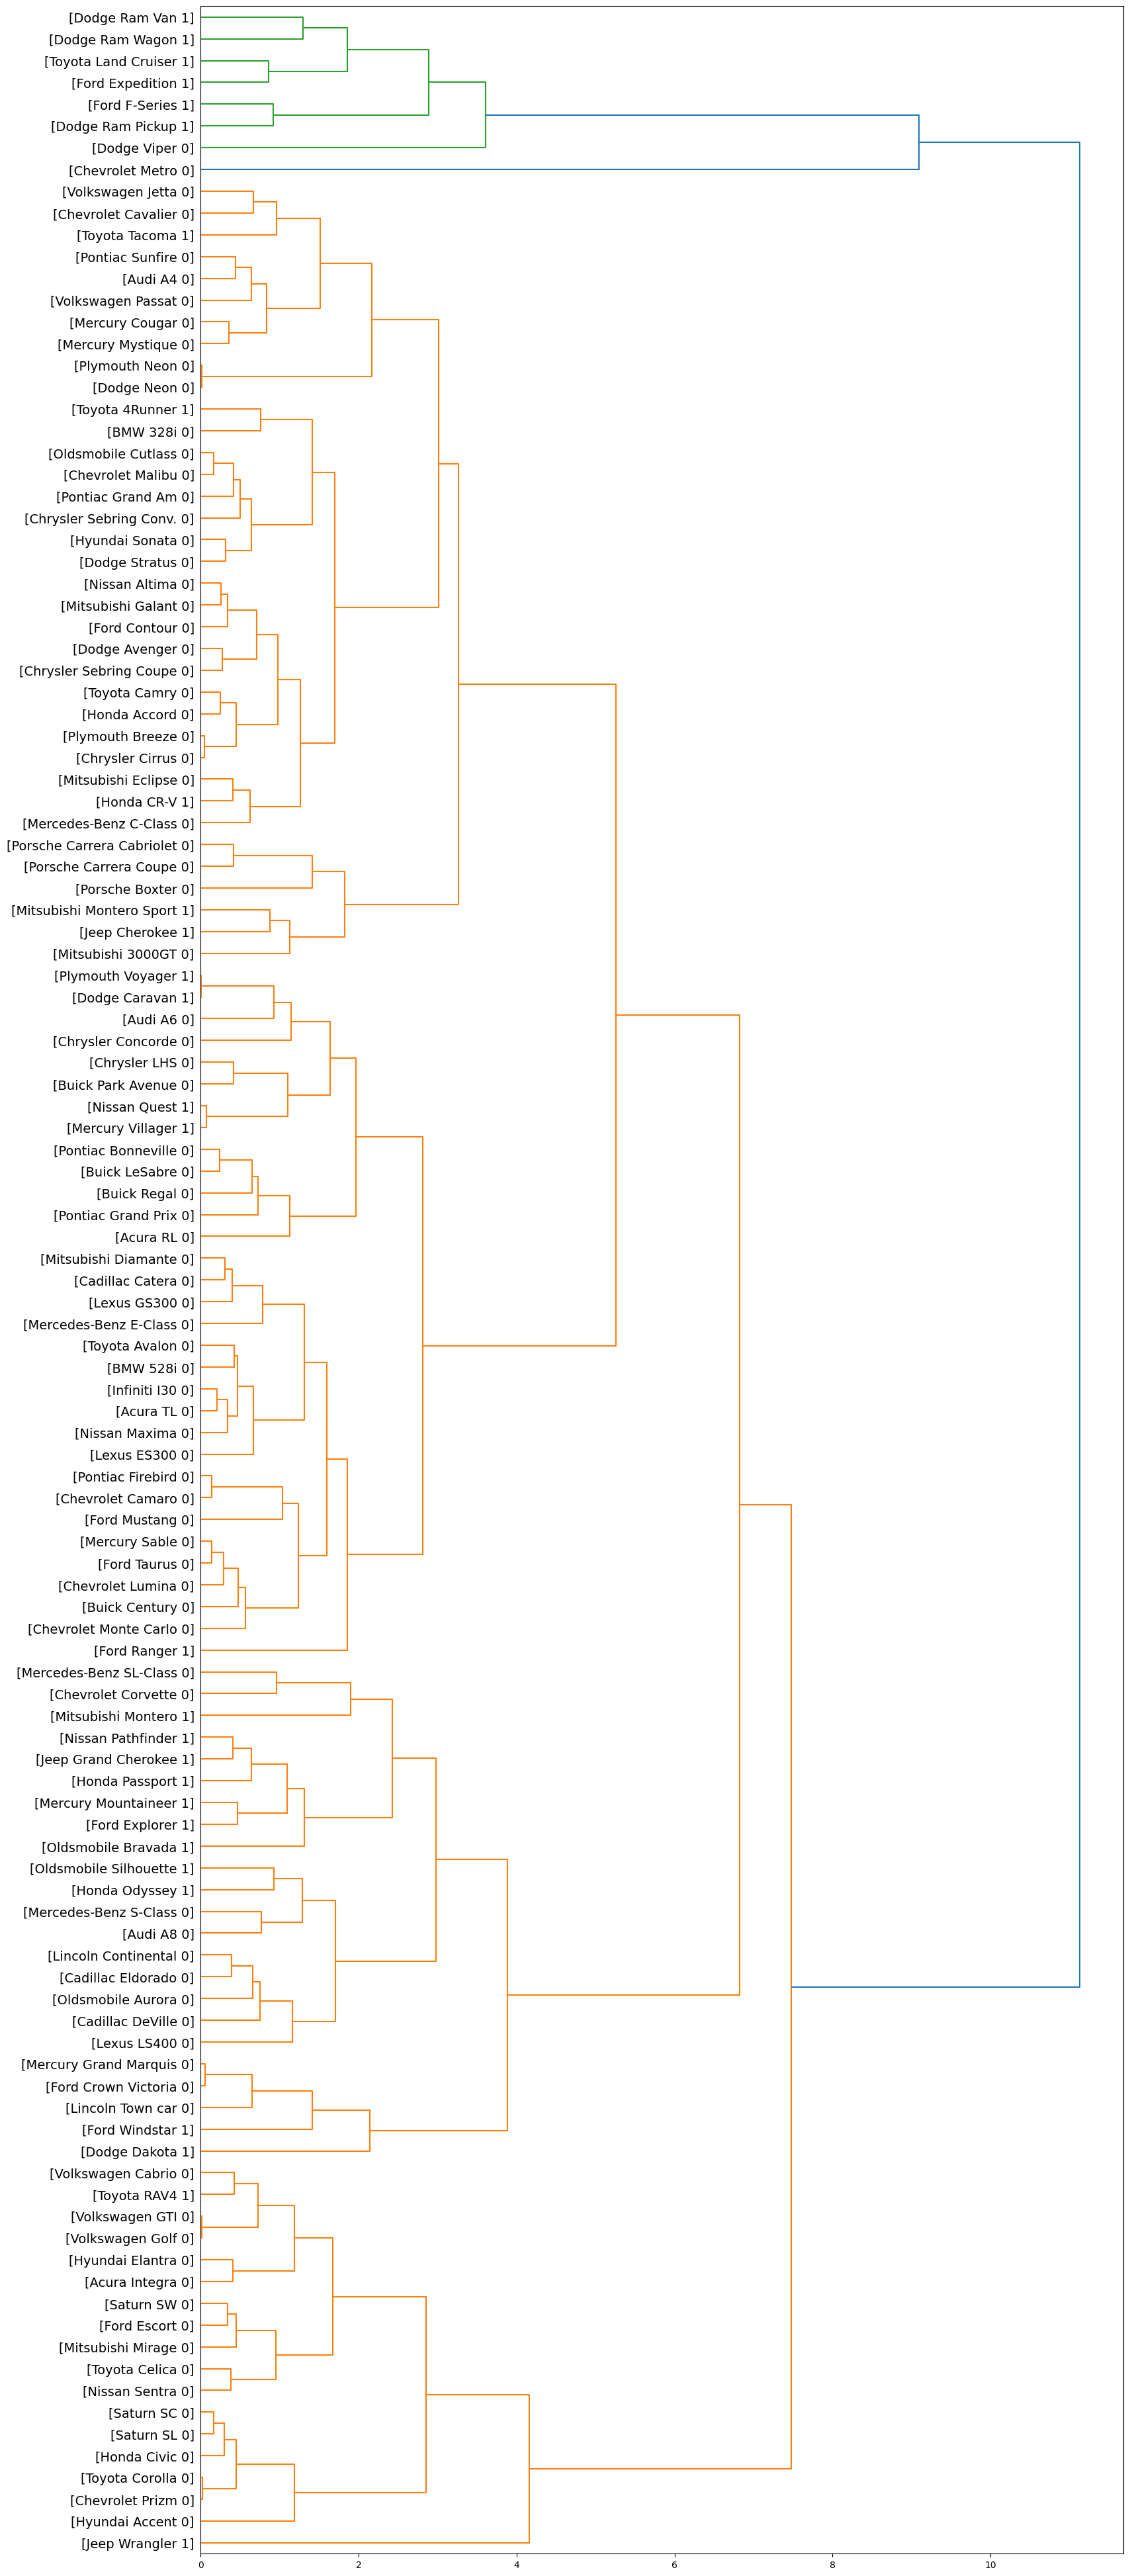

In [69]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =14, orientation = 'right')

### Clustering using scikit-learn
- obtaining distance

In [71]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.585763   0.78573911 ... 0.28685109 0.25672507 0.19866125]
 [0.585763   0.         0.25892304 ... 0.36698373 0.66436916 0.62297526]
 [0.78573911 0.25892304 0.         ... 0.55085974 0.83285848 0.79502645]
 ...
 [0.28685109 0.36698373 0.55085974 ... 0.         0.41920634 0.35863999]
 [0.25672507 0.66436916 0.83285848 ... 0.41920634 0.         0.15212198]
 [0.19866125 0.62297526 0.79502645 ... 0.35863999 0.15212198 0.        ]]


In [74]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_10007/1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


### dendrogram

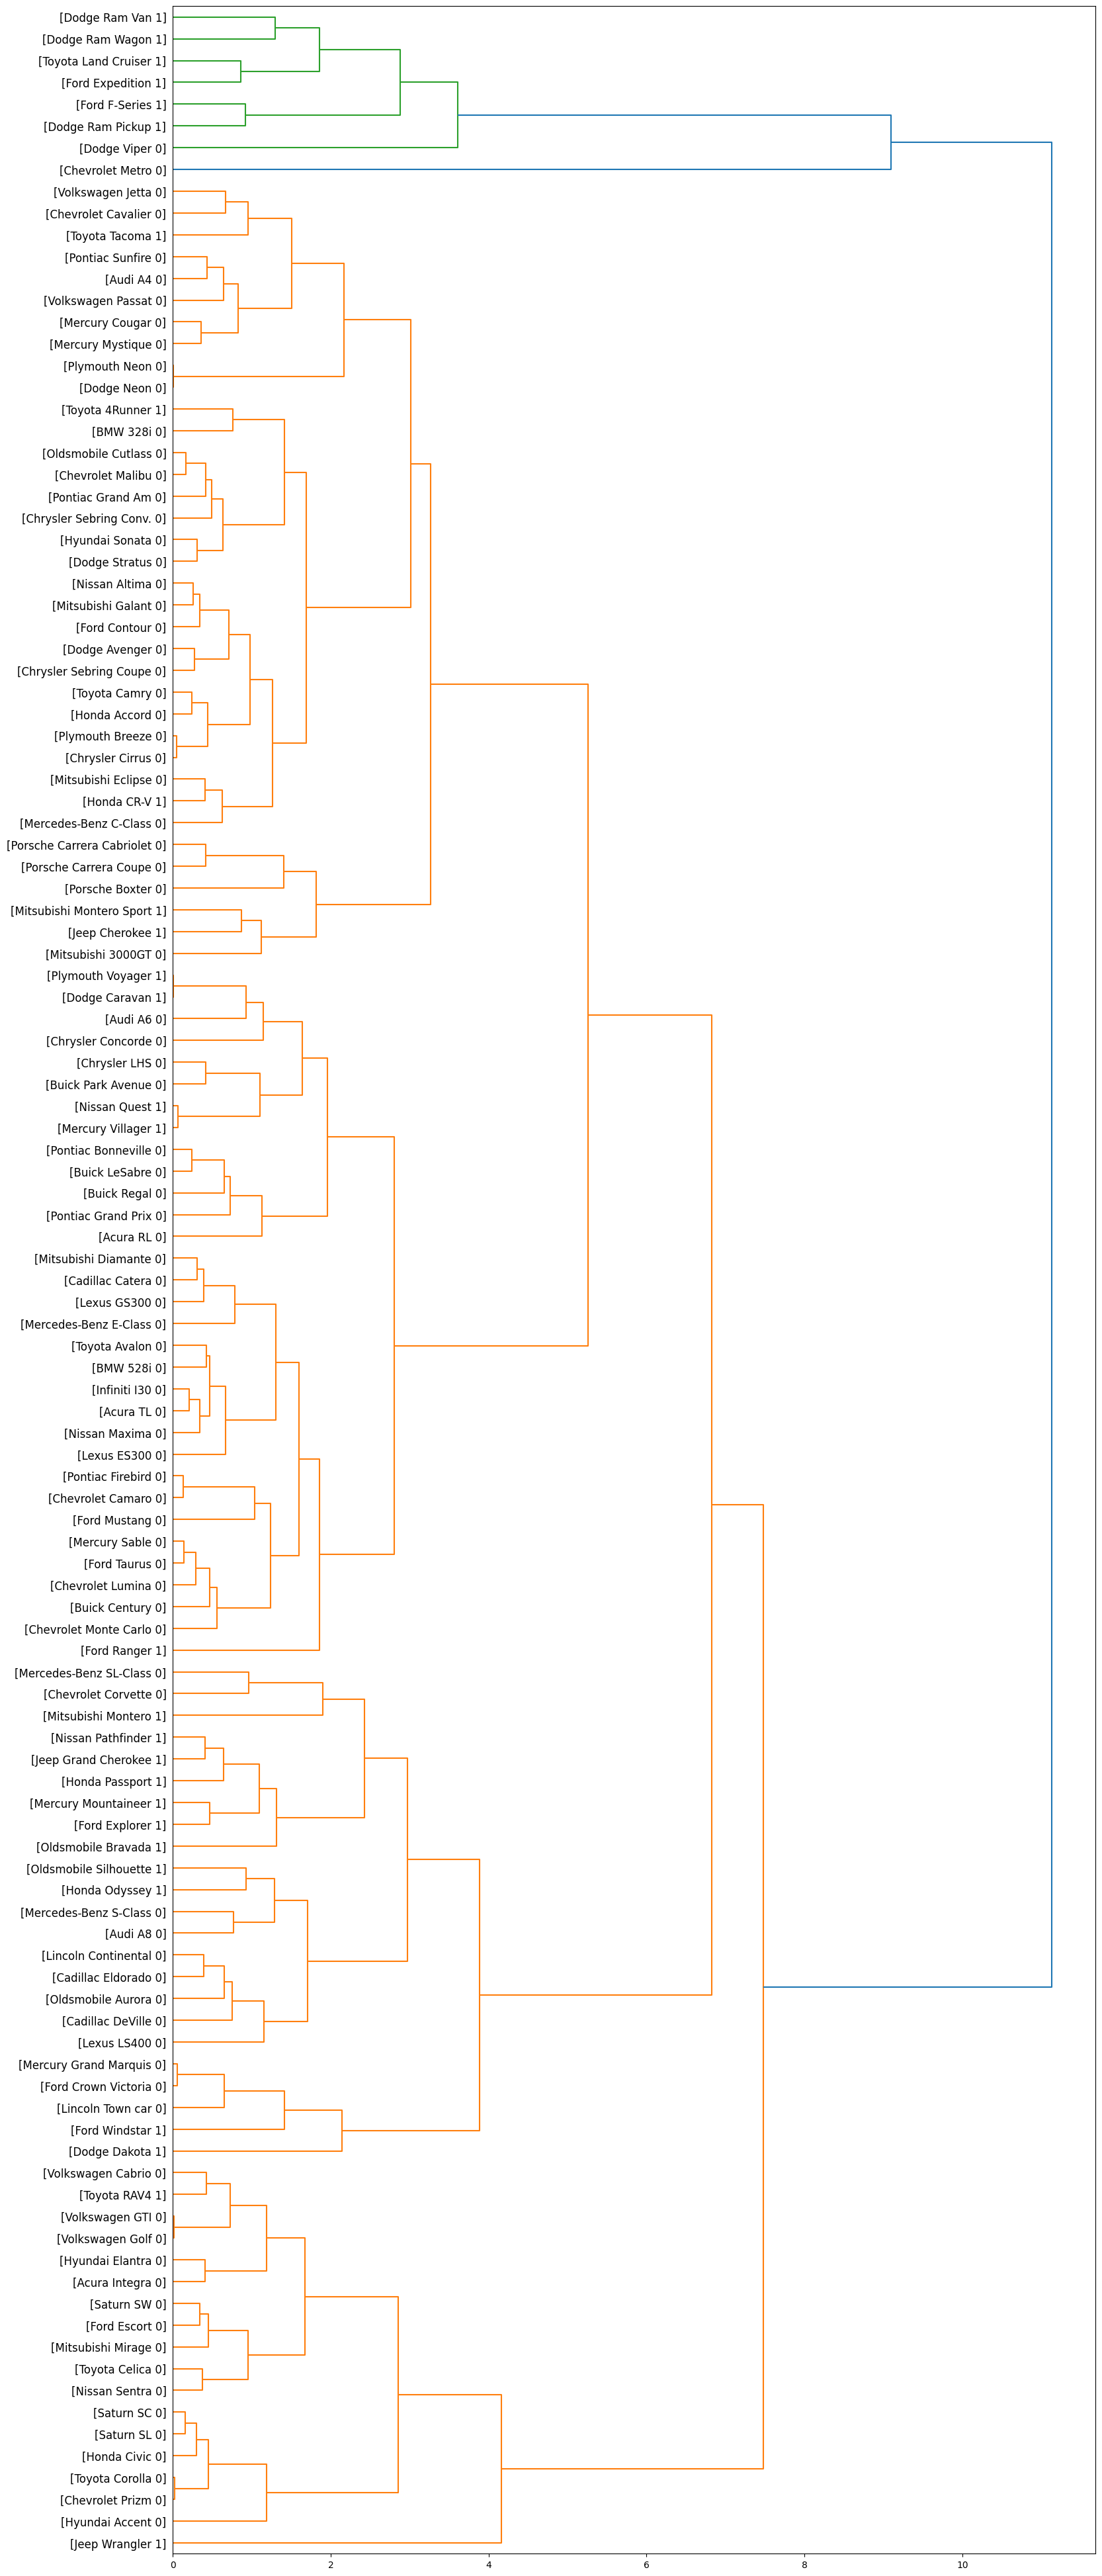

In [73]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [77]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/home/mahdi/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 2, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 1, 0,
       5, 4, 4, 2, 4, 2, 4, 4, 4, 3, 3, 3, 3, 1, 2, 0, 2, 4, 2, 1, 1, 1,
       3, 2, 3, 0, 4, 4, 1, 1, 0, 0, 4, 2, 0, 4, 1, 2, 2, 1, 1, 1, 0, 4,
       4, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 4, 2, 1, 1, 0, 4, 2, 2, 1, 4, 1,
       1, 1, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 4, 2, 0, 4, 0,
       4, 3, 0, 4, 4, 0, 0])

- addding to pdf

In [78]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,l-per-km,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,4
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,2


### plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

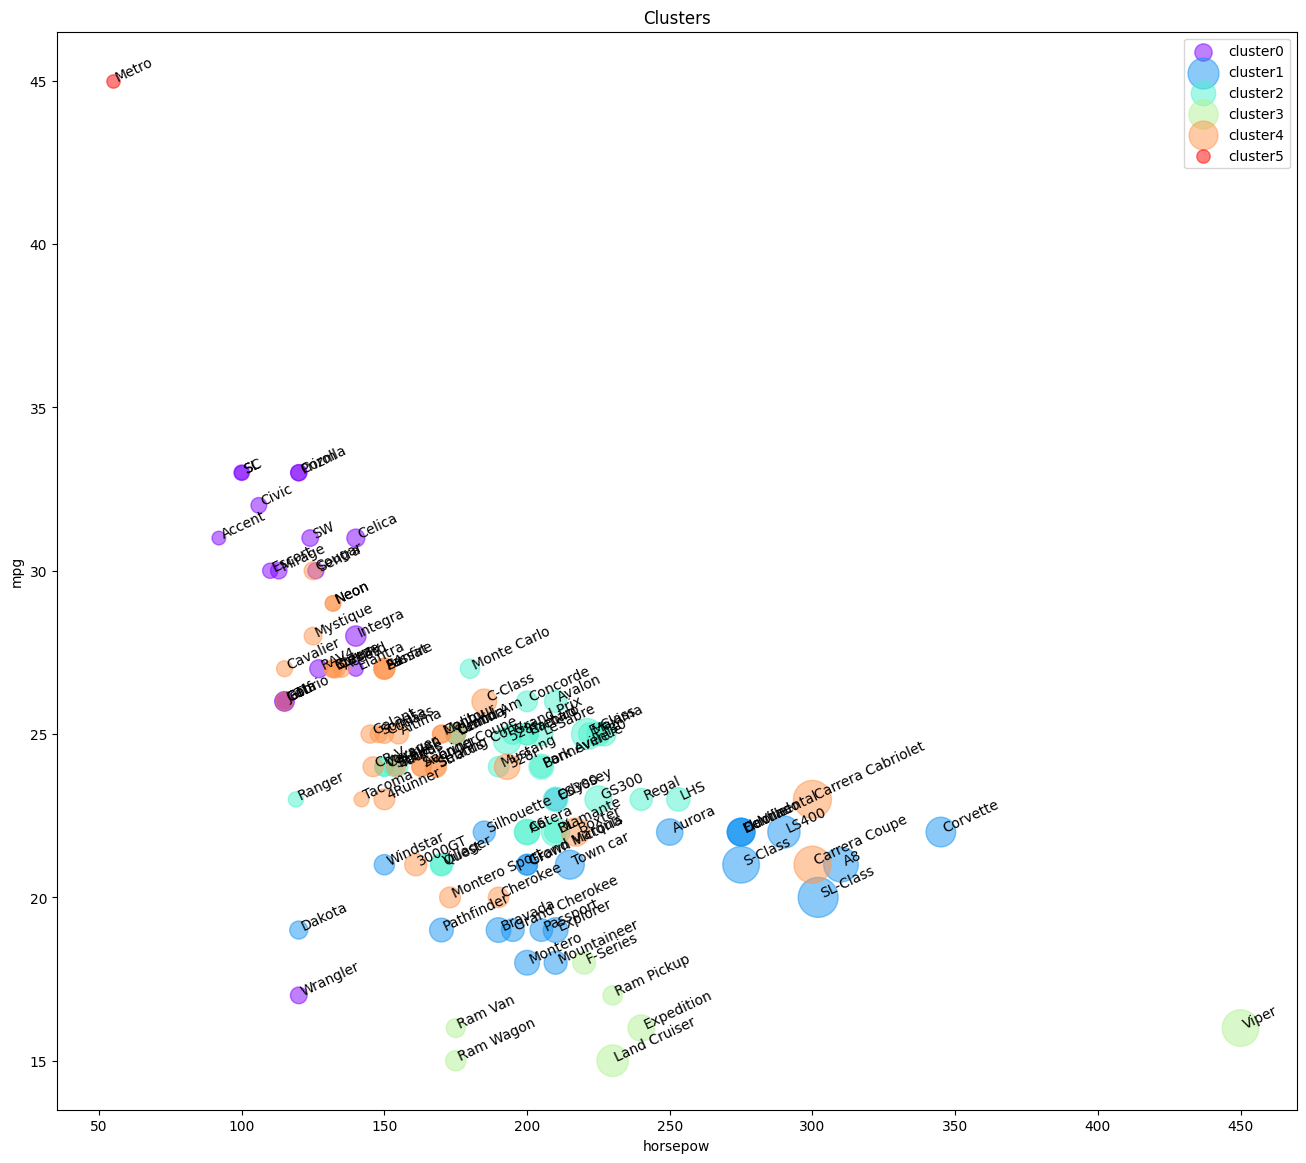

In [79]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### exploration

In [80]:
#groupby is used for grouping the data points 
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     16
          1.0      2
1         0.0     12
          1.0     11
2         0.0     27
          1.0      5
3         0.0      1
          1.0      6
4         0.0     31
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [81]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

/tmp/ipykernel_10007/3307995906.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   117.250000  1.850000  30.000000  14.330125
         1.0   123.500000  2.250000  22.000000  15.674000
1        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   185.909091  3.518182  19.636364  26.856727
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   151.800000  2.780000  22.600000  19.874800
3        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
4        0.0   161.645161  2.451613  25.483871  23.390516
         1.0   160.200000  2.820000  22.000000  19.702600
5        0.0    55.000000  1.000000  45.000000   9.235000

#### plot-centeroid

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

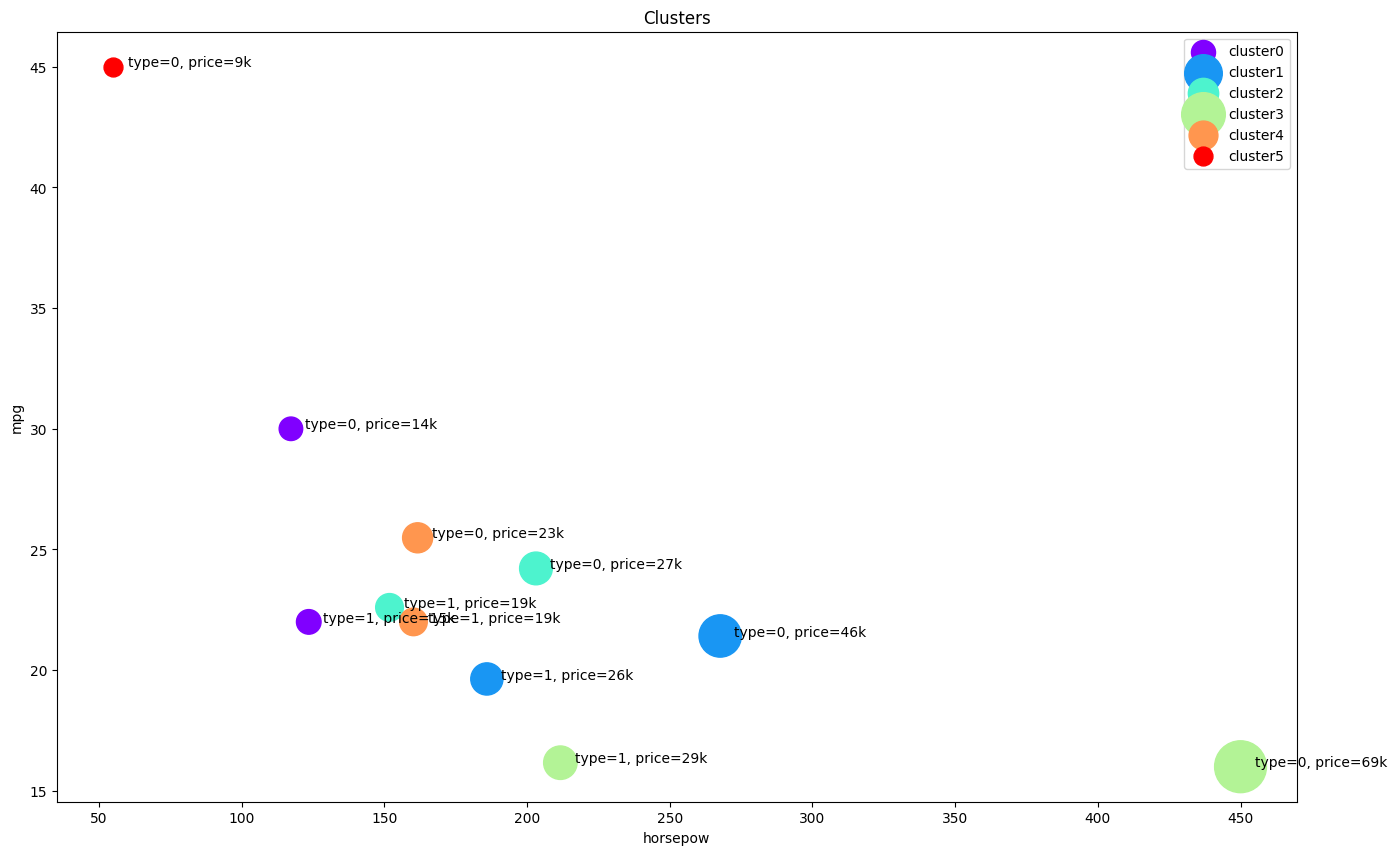

In [84]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
